# Start of PCA

In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
one_hot_encoded_df2 = pd.read_csv('data/model/actReading_11.csv')


In [2]:
# Dropping the specified columns
one_hot_encoded_df2 = one_hot_encoded_df2.drop(columns=['studentId', 'proficient_diff', 'is_proficient'])


In [3]:
one_hot_encoded_df2.head()

,proficient_score,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_ALG I B ACCE,course_ALIITRIGH/A,course_ARMY LET I,...,course_YearbkII9-12,course_Yearbook9-12,course_YrbkIII9-12,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy
0,0.888889,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
1,0.888889,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
2,1.055556,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
3,1.055556,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
4,1.055556,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0


In [24]:
one_hot_encoded_df2.columns.tolist()

['studentId',
 'measurementTypeId',
 'subgroup_lunchStatus',
 'is_proficient',
 'proficient_score',
 'proficient_diff',
 'course_ACT Review',
 'course_ACT/WK Rev.',
 'course_ACTReview.5C',
 'course_AG Communica',
 'course_AIDE-ELEM',
 'course_AIDE-LIB',
 'course_ALG I B ACCE',
 'course_ALIITRIGH/A',
 'course_ARMY LET I',
 'course_ARMY LET II',
 'course_ARMY LET III',
 'course_ARMY LET IV',
 'course_ARMYLETIVACT',
 'course_AcAdv.Baseba',
 'course_AcAdv.Basket',
 'course_AcAdv.CrossC',
 'course_AcAdv.Footb',
 'course_AcAdv.Softba',
 'course_AcAdv.Volley',
 'course_Accounting',
 'course_Adv BTA',
 'course_Advanced Agr',
 'course_Agriscience',
 'course_Alg Esntls B',
 'course_Alg II/Trig',
 'course_AlgEnrichmet',
 'course_AlgII/TrigAC',
 'course_Algebra I',
 'course_Algebra I A',
 'course_Algebra I B',
 'course_Algebra II',
 'course_AlgebraicCon',
 'course_Anat/Physio',
 'course_Anthropology',
 'course_Art App',
 'course_BAND MARCH',
 'course_BANDCONCERT',
 'course_BANDMARCHAUX',
 'course_

## PCA

In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming `encoded_final_df` is your current DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(one_hot_encoded_df2.drop(columns=['proficient_score']))

In [6]:
from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = 0
components = 0

for variance in explained_variance_ratio:
    cumulative_sum += variance
    components += 1
    if cumulative_sum >= 0.80:  # Adjust to your threshold (80%)
        break

print(f"Number of components needed: {components}")
print(f"Cumulative explained variance: {cumulative_sum}")

Number of components needed: 108
Cumulative explained variance: 0.8031976486267409


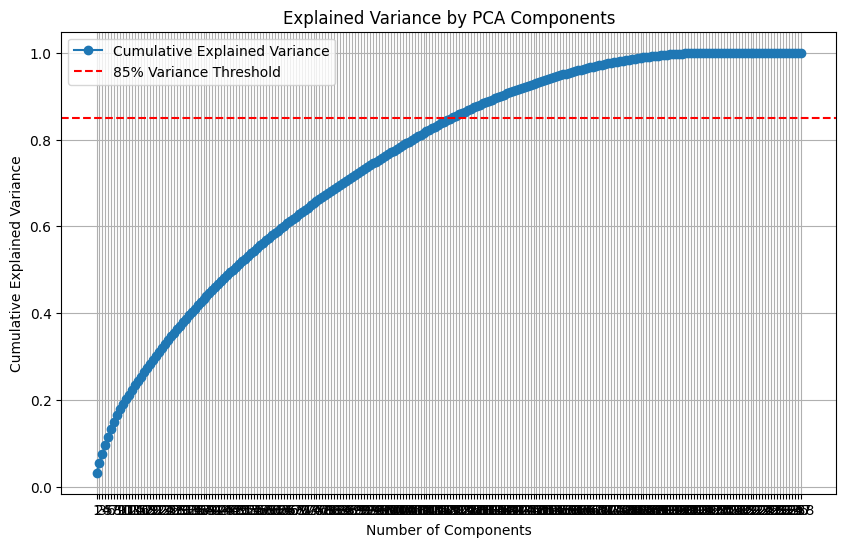

Number of components needed: 121


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_scaled is already defined and contains your scaled data
pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Variance Threshold')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid()
plt.show()

# Calculate the number of components needed to explain at least 85% variance
components = np.argmax(cumulative_variance >= 0.85) + 1  # Add 1 to get the count of components
print(f"Number of components needed: {components}")


In [8]:
X_pca = pca.transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [9]:
first_108_pcs_df = X_pca_df.iloc[:, :108].copy()

In [11]:
first_108_pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108
0,0.110937,1.638292,24.112886,4.566716,-5.905436,-1.349250,3.578944,0.983968,-1.181895,8.522364,...,0.114371,0.254416,0.094873,-0.482036,-0.542497,0.120446,-0.432339,0.934933,0.098480,-0.735793
1,0.110937,1.638292,24.112886,4.566716,-5.905436,-1.349250,3.578944,0.983968,-1.181895,8.522364,...,0.114371,0.254416,0.094873,-0.482036,-0.542497,0.120446,-0.432339,0.934933,0.098480,-0.735793
2,0.239009,-0.621229,0.684855,-0.534362,0.898897,-0.404811,-0.942524,-1.987721,-1.188951,-0.088060,...,-0.027845,0.004684,0.002129,0.003784,0.026517,-0.032444,0.024476,0.010627,-0.018400,0.033267
3,0.239009,-0.621229,0.684855,-0.534362,0.898897,-0.404811,-0.942524,-1.987721,-1.188951,-0.088060,...,-0.027845,0.004684,0.002129,0.003784,0.026517,-0.032444,0.024476,0.010627,-0.018400,0.033267
4,0.239009,-0.621229,0.684855,-0.534362,0.898897,-0.404811,-0.942524,-1.987721,-1.188951,-0.088060,...,-0.027845,0.004684,0.002129,0.003784,0.026517,-0.032444,0.024476,0.010627,-0.018400,0.033267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,0.278231,-0.779888,0.890313,-0.702643,1.236055,-0.559061,-1.334703,-3.005750,-1.924258,-0.163495,...,-0.000267,0.000130,0.000065,0.000158,0.001174,-0.001959,0.002060,0.001025,-0.001862,0.003682
3831,0.321641,-0.960680,1.127349,-0.897546,1.632317,-0.740599,-1.799840,-4.236165,-2.828768,-0.259164,...,0.058978,-0.009750,-0.004419,-0.007773,-0.054332,0.065451,-0.048251,-0.020700,0.035675,-0.063902
3832,0.321641,-0.960680,1.127349,-0.897546,1.632317,-0.740599,-1.799840,-4.236165,-2.828768,-0.259164,...,0.058978,-0.009750,-0.004419,-0.007773,-0.054332,0.065451,-0.048251,-0.020700,0.035675,-0.063902
3833,0.321641,-0.960680,1.127349,-0.897546,1.632317,-0.740599,-1.799840,-4.236165,-2.828768,-0.259164,...,0.058978,-0.009750,-0.004419,-0.007773,-0.054332,0.065451,-0.048251,-0.020700,0.035675,-0.063902


In [12]:
import numpy as np

# Assuming pca is already fitted and X_scaled is available
# Get the PCA components (loadings)
components = pca.components_[:108]  # First 18 principal components

# Create a DataFrame for feature loadings
feature_loadings_df = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])],
                                    index = one_hot_encoded_df2.drop(columns=['proficient_score']).columns)

# Find the most important features for each principal component
top_features = {}

for pc in feature_loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features = feature_loadings_df[pc].abs().sort_values(ascending=False)
    # Select the top 5 features (you can adjust this number)
    top_features[pc] = sorted_features.head(5).index.tolist()

# Display the top features for each principal component
for pc, features in top_features.items():
    print(f'Top features for {pc}: {features}')

Top features for PC1: ['course_HEALTH 9-12', 'course_DRIVERS ED', 'course_D&TSafetyEd', 'school_High School B', 'course_Health 9-12']
Top features for PC2: ['course_Physical Sci', 'course_English Gr10', 'course_Algebra I B', 'course_Eng Gr10 Adv', 'course_ChemistryAdv']
Top features for PC3: ['course_Ess II:USHis', 'course_Ess: Phy Sci', 'course_Eng Ess 10', 'course_Alg Esntls B', 'course_RdIntrv7-12']
Top features for PC4: ['school_High School B', 'course_BullBogAdv', 'school_High School A', 'course_Panther Adv', 'course_HISTUS1877AC']
Top features for PC5: ['course_PhySciACCESS', 'course_EnglGr10ACCE', 'course_HealthACCESS', 'course_Ess: E & SS', 'course_TranSer 11']
Top features for PC6: ['course_Ess: E & SS', 'course_TranSer 11', 'course_Eng Ess 11', 'course_EssIII:USHis', 'course_Geo Ess']
Top features for PC7: ['course_PhySciACCESS', 'course_EnglGr10ACCE', 'course_HealthACCESS', 'course_USHisIG10ACC', 'course_AlgII/TrigAC']
Top features for PC8: ['school_High School D', 'course_E

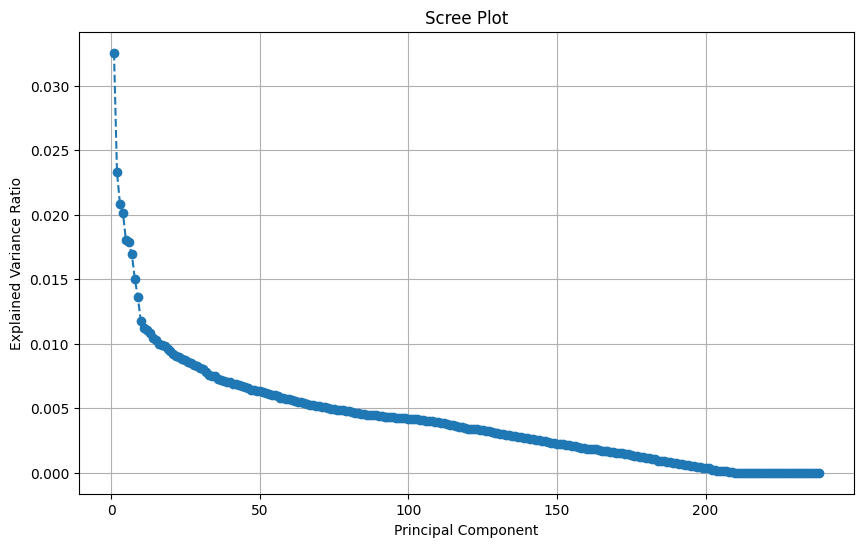

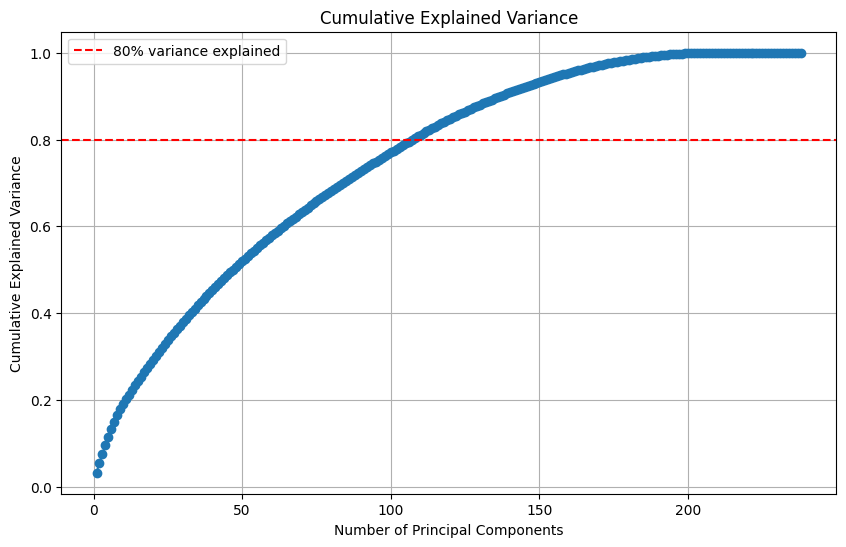

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance explained')  # Adjust threshold as needed
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


# Start of Catboost

In [57]:

from sklearn.model_selection import train_test_split

import pandas as pd

import numpy as np


In [14]:
X = first_108_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels


In [15]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3116307	test: 0.3078687	best: 0.3078687 (0)	total: 187ms	remaining: 1m 33s
50:	learn: 0.2292713	test: 0.2470840	best: 0.2470840 (50)	total: 2.06s	remaining: 18.1s
100:	learn: 0.2089287	test: 0.2301145	best: 0.2301145 (100)	total: 3.83s	remaining: 15.1s
150:	learn: 0.1986068	test: 0.2189023	best: 0.2189023 (150)	total: 5.53s	remaining: 12.8s
200:	learn: 0.1941771	test: 0.2135962	best: 0.2135962 (200)	total: 7.23s	remaining: 10.8s
250:	learn: 0.1920581	test: 0.2106447	best: 0.2106447 (250)	total: 9.02s	remaining: 8.95s
300:	learn: 0.1907738	test: 0.2091306	best: 0.2091306 (300)	total: 10.7s	remaining: 7.1s
350:	learn: 0.1901119	test: 0.2085248	best: 0.2085248 (350)	total: 12.5s	remaining: 5.29s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2082557883
bestIteration = 380

Shrink model to first 381 iterations.
Mean Squared Error (MSE): 0.04
R-squared (R²): 0.56


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Root Mean Squared Error (RMSE): 0.21


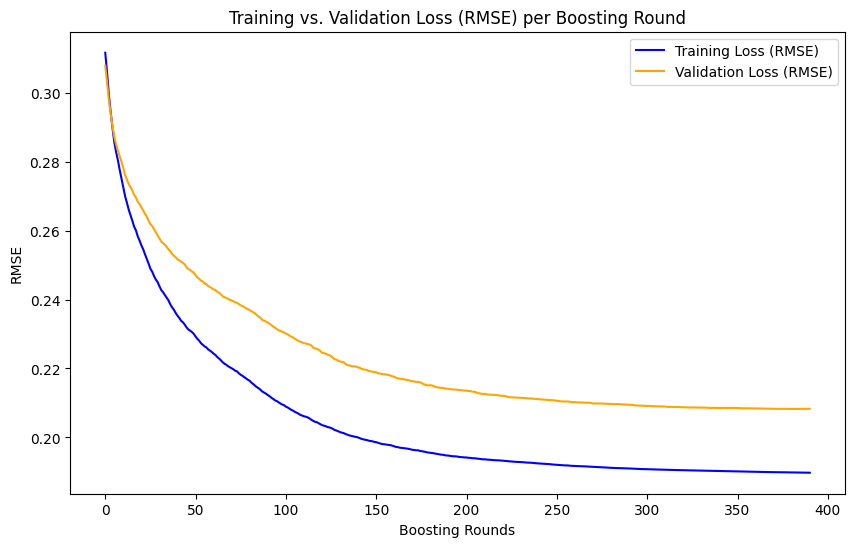

In [16]:
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Step 3: Identify Categorical Features
categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]

# Step 4: Prepare the CatBoost data pools
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validation_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

# Train the CatBoost Model with logging of evaluation metrics
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=50,
    random_seed=42,
    cat_features=categorical_features_indices,
    eval_metric='RMSE'  # Set appropriate evaluation metric for regression
)

# Fit the model with early stopping
model.fit(
    train_pool,
    eval_set=validation_pool,
    use_best_model=True,
    plot=True,
    early_stopping_rounds=10  # Enable early stopping
)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False gives RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Extract training and validation loss from the evals result
eval_history = model.get_evals_result()
train_loss = eval_history['learn']['RMSE']
validation_loss = eval_history['validation']['RMSE']

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()


In [17]:
# Optional: Get Feature Importance
feature_importances = model.get_feature_importance(prettified=True)
print(feature_importances)

    Feature Id  Importances
0          PC2    17.141410
1         PC23     2.377732
2          PC4     2.221858
3          PC9     2.206977
4         PC97     2.112854
..         ...          ...
103       PC10     0.218690
104       PC50     0.188653
105       PC19     0.107613
106       PC45     0.078230
107       PC26     0.055793

[108 rows x 2 columns]


In [18]:
# Get feature importance from CatBoost
feature_importances = model.get_feature_importance(prettified=True)

# Filter for features with importance greater than 1
important_features = feature_importances[feature_importances['Importances'] > 1]
print("Features with importance > 1:")
print(important_features)


Features with importance > 1:
   Feature Id  Importances
0         PC2    17.141410
1        PC23     2.377732
2         PC4     2.221858
3         PC9     2.206977
4        PC97     2.112854
5       PC104     1.950163
6        PC66     1.939510
7        PC11     1.860835
8        PC54     1.741898
9         PC7     1.690613
10       PC74     1.595756
11       PC35     1.575354
12        PC6     1.455850
13        PC5     1.375042
14       PC15     1.218801
15       PC93     1.137903
16        PC3     1.131599
17       PC82     1.127578
18       PC67     1.127380
19       PC29     1.124337
20        PC1     1.120389
21       PC89     1.085748
22       PC37     1.079059
23       PC84     1.058748
24       PC87     1.056350
25       PC55     1.047984
26       PC39     1.046406
27       PC18     1.044843


In [162]:
'''
Features with importance > 1: (catboost)
   Feature Id  Importances
0         PC2    32.133359
1        PC82     3.934939
2         PC5     3.355006
3         PC3     2.606535
4        PC81     2.499089
5        PC56     2.488508
6        PC30     2.105324
7        PC80     2.090040
8        PC95     2.030455
9        PC57     1.901461
10       PC28     1.868178
11       PC19     1.686546
12       PC26     1.348930
13       PC62     1.258701
14        PC7     1.202222
15       PC12     1.195307
16       PC24     1.152808
17       PC89     1.141246
18        PC4     1.068447
'''

'\nFeatures with importance > 1: (catboost)\n   Feature Id  Importances\n0         PC2    32.133359\n1        PC82     3.934939\n2         PC5     3.355006\n3         PC3     2.606535\n4        PC81     2.499089\n5        PC56     2.488508\n6        PC30     2.105324\n7        PC80     2.090040\n8        PC95     2.030455\n9        PC57     1.901461\n10       PC28     1.868178\n11       PC19     1.686546\n12       PC26     1.348930\n13       PC62     1.258701\n14        PC7     1.202222\n15       PC12     1.195307\n16       PC24     1.152808\n17       PC89     1.141246\n18        PC4     1.068447\n'

# final XGBoost model

Cross-Validated MSE: 0.02
[0]	train-rmse:0.19323	eval-rmse:0.19967
[1]	train-rmse:0.18526	eval-rmse:0.19123
[2]	train-rmse:0.17806	eval-rmse:0.18366
[3]	train-rmse:0.17182	eval-rmse:0.17706
[4]	train-rmse:0.16640	eval-rmse:0.17125
[5]	train-rmse:0.16167	eval-rmse:0.16633
[6]	train-rmse:0.15767	eval-rmse:0.16210
[7]	train-rmse:0.15448	eval-rmse:0.15866
[8]	train-rmse:0.15162	eval-rmse:0.15565
[9]	train-rmse:0.14881	eval-rmse:0.15234
[10]	train-rmse:0.14638	eval-rmse:0.14978
[11]	train-rmse:0.14442	eval-rmse:0.14749
[12]	train-rmse:0.14261	eval-rmse:0.14557
[13]	train-rmse:0.14097	eval-rmse:0.14378
[14]	train-rmse:0.13956	eval-rmse:0.14224
[15]	train-rmse:0.13840	eval-rmse:0.14083
[16]	train-rmse:0.13735	eval-rmse:0.13961
[17]	train-rmse:0.13628	eval-rmse:0.13848
[18]	train-rmse:0.13514	eval-rmse:0.13730
[19]	train-rmse:0.13433	eval-rmse:0.13650
[20]	train-rmse:0.13343	eval-rmse:0.13558
[21]	train-rmse:0.13266	eval-rmse:0.13471
[22]	train-rmse:0.13212	eval-rmse:0.13414
[23]	train-rmse:0.

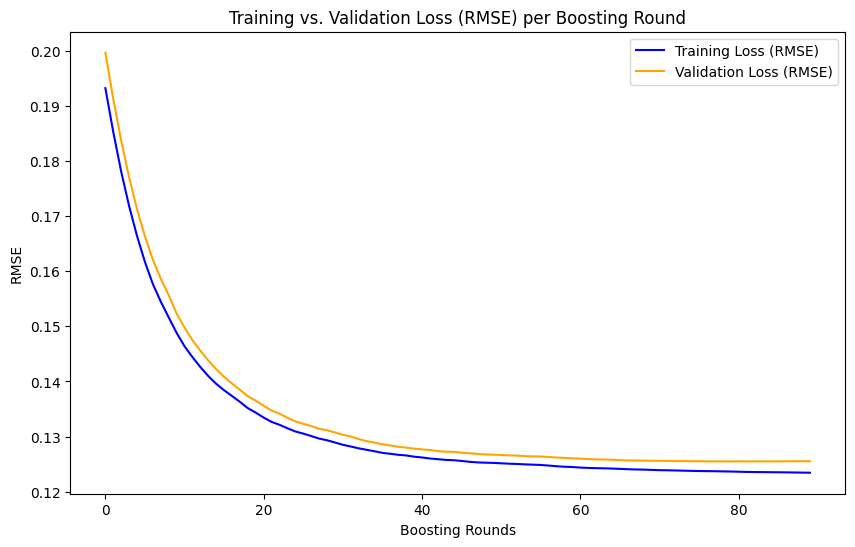

XGBoost - MSE: 0.02, R²: 0.64, RMSE: 0.13


In [59]:
from xgboost import XGBRegressor, DMatrix, train
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the XGBRegressor with additional regularization and reduced complexity
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,       # Reduced depth to limit complexity
    reg_alpha=0.1,     # L1 regularization
    reg_lambda=0.1,    # L2 regularization
    random_state=42
)

# Run cross-validation to get an estimate of the model's performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f"Cross-Validated MSE: {mean_cv_mse:.2f}")

# Prepare data in DMatrix format for training with early stopping
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for the XGBoost model
params = {
    'max_depth': 6, #this affects the r2 th emost
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Update evals list to include both training and validation sets
evals = [(dtrain, 'train'), (dtest, 'eval')]

# Train the XGBoost model with early stopping, tracking both training and validation losses
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract train and eval loss from evals_result
train_loss = evals_result['train']['rmse']
validation_loss = evals_result['eval']['rmse']

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()

# Make predictions on the test set
xgb_y_pred = xgb_model_trained.predict(dtest)

# Evaluate the model's performance on the test set
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")


In [ ]:
'''
from xgboost import XGBRegressor, DMatrix, train, cv
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters tuning with grid search
param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0.01, 0.1, 1],
    'reg_lambda': [0.01, 0.1, 1]
}

# Initialize and train with GridSearchCV
xgb_grid = XGBRegressor(random_state=42, objective='reg:squarederror')
grid_search = GridSearchCV(xgb_grid, param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Use the best estimator found by GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Use DMatrix for early stopping and evaluation tracking
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Prepare params for DMatrix training
params = best_xgb_model.get_params()
params['objective'] = 'reg:squarederror'

# Perform training with early stopping
evals_result = {}
best_xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtrain, 'train'), (dtest, 'eval')],
    early_stopping_rounds=15,
    verbose_eval=True,
    evals_result=evals_result
)

# Plot training vs validation losses for analysis
train_loss = evals_result['train']['rmse']
validation_loss = evals_result['eval']['rmse']
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()

# Predict on the test set
xgb_y_pred = best_xgb_model_trained.predict(dtest)

# Evaluate performance
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse
'''

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, DMatrix, train
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import shap

# Assuming xgb_model_trained is already fitted

# Step 1: Extract Feature Importances
importance_dict = xgb_model_trained.get_score(importance_type='weight')  # Use 'weight' or 'gain' for different importance types

# Convert the importance dictionary to a DataFrame
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)



In [192]:
# Step 1: Extract Feature Importances
importance_dict = xgb_model_trained.get_score(importance_type='weight')  # or 'gain'
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

# Step 2: Filter features with Importance > 1
filtered_importance_df = importance_df[importance_df['Importance'] > 20]

# Step 3: Print the filtered importance table
print(filtered_importance_df)


    Feature  Importance
1       PC2        72.0
3       PC4        38.0
0       PC1        32.0
77     PC78        31.0
2       PC3        29.0
83     PC84        29.0
5       PC6        26.0
42     PC43        26.0
16     PC17        23.0
60     PC61        22.0
39     PC40        22.0
103   PC104        22.0
71     PC72        22.0
21     PC22        21.0


In [166]:
'''
Feature  Importance
1      PC2       106.0
2      PC3        58.0
4      PC5        41.0
79    PC82        38.0
6      PC7        37.0
92    PC95        36.0
54    PC56        31.0
41    PC43        30.0
60    PC62        29.0
29    PC30        25.0
18    PC19        24.0
25    PC26        24.0
55    PC57        24.0
87    PC90        22.0
44    PC46        22.0
11    PC12        21.0
0      PC1        21.0

'''

'\nFeature  Importance\n1      PC2       106.0\n2      PC3        58.0\n4      PC5        41.0\n79    PC82        38.0\n6      PC7        37.0\n92    PC95        36.0\n54    PC56        31.0\n41    PC43        30.0\n60    PC62        29.0\n29    PC30        25.0\n18    PC19        24.0\n25    PC26        24.0\n55    PC57        24.0\n87    PC90        22.0\n44    PC46        22.0\n11    PC12        21.0\n0      PC1        21.0\n\n'

# extra preliminary models

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Train Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
gb_y_pred = gb_model.predict(X_test)

# Evaluate
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)
print(f"Gradient Boosting - MSE: {gb_mse:.2f}, R²: {gb_r2:.2f}, RMSE: {gb_rmse:.2f}")


Gradient Boosting - MSE: 0.02, R²: 0.55, RMSE: 0.14


In [140]:
# Step 4: Extract Feature Importances
importance_dict_gb = dict(zip(X_train.columns, gb_model.feature_importances_))
importance_df_gb = pd.DataFrame(list(importance_dict_gb.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)


# Step 6: Filter features with Importance > 0 (or a lower threshold)
filtered_importance_df_gb = importance_df_gb[importance_df_gb['Importance'] > 0.01]

# Step 7: Print the filtered importance table for Gradient Boosting
print("Filtered Feature Importances (Gradient Boosting):")
print(filtered_importance_df_gb)

Filtered Feature Importances (Gradient Boosting):
   Feature  Importance
1      PC2    0.567158
2      PC3    0.036438
81    PC82    0.032996
4      PC5    0.024791
3      PC4    0.020366
29    PC30    0.019563
94    PC95    0.017897
25    PC26    0.017076
55    PC56    0.015056
18    PC19    0.012400
61    PC62    0.012077
40    PC41    0.012035


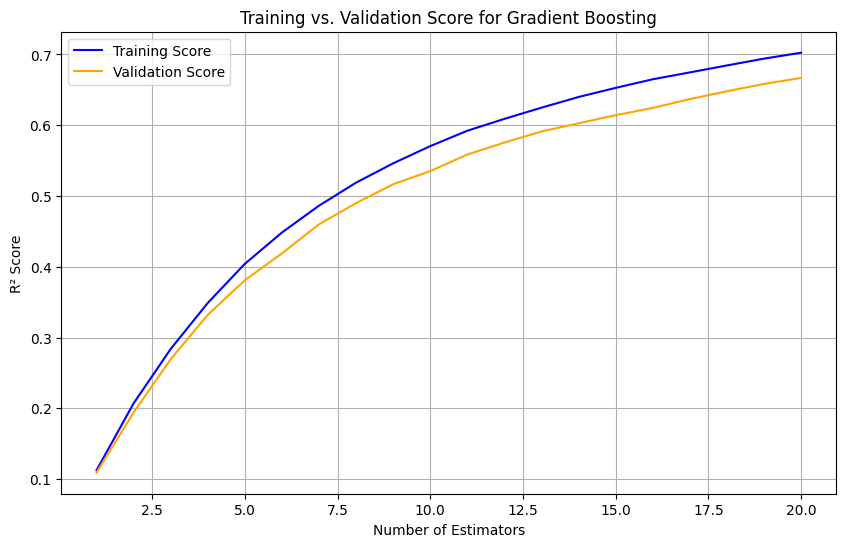

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Example: Ensure your X_train and y_train are defined
# X_train = ... (your features)
# y_train = ... (your target variable)

# Step 1: Initialize lists for scores
train_scores = []
test_scores = []

# Step 2: Iterate through a reduced number of estimators
for i in range(1, 21):  # Reduced to 20 for faster computation
    gb_model = GradientBoostingRegressor(n_estimators=i, learning_rate=0.1, random_state=42)
    
    # Use cross-validation for training score
    train_cv_score = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='r2').mean()
    train_scores.append(train_cv_score)

    # Fit the model on the full training data
    gb_model.fit(X_train, y_train)
    
    # Calculate validation score
    test_scores.append(gb_model.score(X_test, y_test))

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_scores, label='Training Score', color='blue')
plt.plot(range(1, 21), test_scores, label='Validation Score', color='orange')
plt.xlabel('Number of Estimators')
plt.ylabel('R² Score')
plt.title('Training vs. Validation Score for Gradient Boosting')
plt.legend()
plt.grid(True)
plt.show()


# summary of common important features (will update)

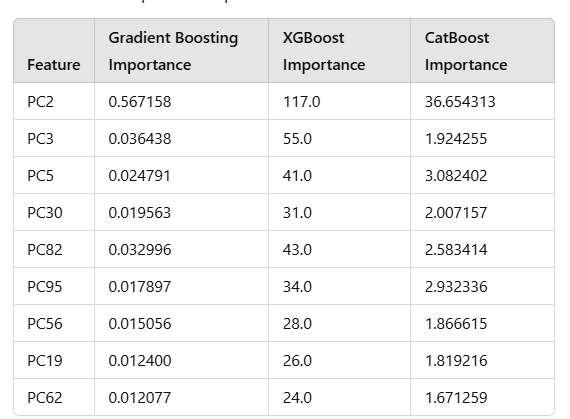

PC2 is highly important across all three models, showing consistent importance.
PC3 and PC5 also appear in all three models, but their importance values vary significantly between them.
The importance values from XGBoost and CatBoost are much higher compared to Gradient Boosting, indicating that those models might be more sensitive to these features.
Other features such as PC30, PC82, and PC95 appear to be important across multiple models, though they have varying levels of importance.

mportant Features for Principal Components
PC2:

Top Features:
course_ChemistryAdv
course_Eng Gr10 Adv
course_Physical Sci
course_USHis I Adv
course_English Gr10
Observation: Consistently important across all models, indicating its significant contribution to explaining variance.
PC3:

Top Features:
studentId
course_Ess II:USHis
course_Ess: Phy Sci
course_Eng Ess 10
course_Alg Esntls B
Observation: Appears in all models, but its importance may vary significantly, suggesting it's sensitive to the modeling approach.
PC5:

Top Features:
course_Ess II:USHis
course_Ess: Phy Sci
studentId
course_Eng Ess 10
course_Alg Esntls B
Observation: Similar to PC3, its importance is variable across models, emphasizing that these features may have varying impacts.
Other Notable PCs:

PC30:
Top features: course_Marine Sci, course_LATIN 1 ACC, course_VarBkbalI, course_VisArtI.5C, course_AIDE-LIB
Importance: Important across multiple models.
PC82 and PC95: While their specific top features were not listed in your output, the mention of their importance suggests that they too play a crucial role in the models being analyzed.
Summary of Observations
PC2 is a strong indicator across all models, implying that it holds a significant relationship with the output variable you are studying.
PC3 and PC5 show sensitivity to the model type used, indicating that the underlying relationships captured by these PCs might change depending on the model's structure.
Other PCs such as PC30, PC82, and PC95 have varying importance levels, which indicates the complexity of the data and how different components can interact in influencing outcomes.
Next Steps
It would be beneficial to further analyze the exact numerical importance values from each model to draw deeper insights and make comparisons.
Visualizations, such as bar charts for feature importance from each model, could provide a clearer picture of how these features impact the results across different approaches.
If you have any specific tasks or further analysis in mind regarding these findings, let me know!

## extra models

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2058636	test: 0.1903646	best: 0.1903646 (0)	total: 174ms	remaining: 1m 26s
50:	learn: 0.1404788	test: 0.1409107	best: 0.1409107 (50)	total: 1.23s	remaining: 10.8s
100:	learn: 0.1285473	test: 0.1316611	best: 0.1316611 (100)	total: 2.52s	remaining: 9.95s
150:	learn: 0.1223806	test: 0.1261502	best: 0.1261502 (150)	total: 3.73s	remaining: 8.61s
200:	learn: 0.1197780	test: 0.1240033	best: 0.1240033 (200)	total: 5.21s	remaining: 7.75s
250:	learn: 0.1183761	test: 0.1225963	best: 0.1225963 (250)	total: 6.41s	remaining: 6.36s
300:	learn: 0.1177122	test: 0.1220323	best: 0.1220323 (300)	total: 7.81s	remaining: 5.17s
350:	learn: 0.1172982	test: 0.1215866	best: 0.1215866 (350)	total: 9.08s	remaining: 3.85s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.121502858
bestIteration = 358

Shrink model to first 359 iterations.
Stacked Model - MSE: 0.01, R²: 0.61, RMSE: 0.12


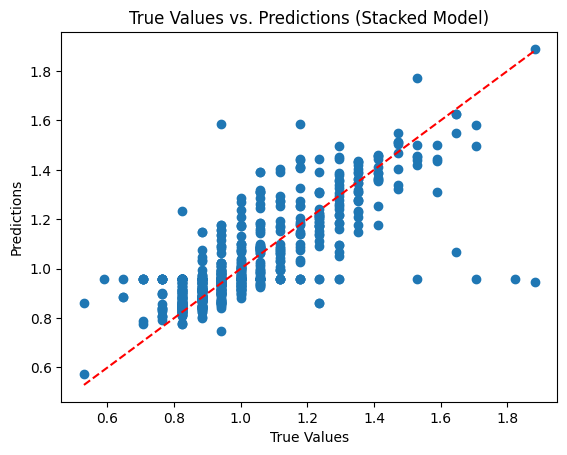

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor, Pool
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Split your data
X_train, X_test, y_train, y_test = train_test_split(
    first_55_pcs_df,
    one_hot_encoded_df2['proficient_score'],
    test_size=0.2,
    random_state=42
)

# Step 3: CatBoost Model
categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validation_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

catboost_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=50,
    random_seed=42,
    cat_features=categorical_features_indices,
    eval_metric='RMSE'
)

catboost_model.fit(
    train_pool,
    eval_set=validation_pool,
    use_best_model=True,
    plot=True,
    early_stopping_rounds=10
)

# Predictions from CatBoost
cat_y_pred_train = catboost_model.predict(X_train)
cat_y_pred_test = catboost_model.predict(X_test)

# Step 4: Stack Predictions
# Create a new DataFrame for stacked predictions
stacked_train = np.column_stack((rf_y_pred_train, cat_y_pred_train))
stacked_test = np.column_stack((rf_y_pred_test, cat_y_pred_test))

# Step 2: Random Forest Model
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [20],
    'min_samples_split': [5]
}
rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Predictions from Random Forest
rf_y_pred_train = best_rf_model.predict(X_train)
rf_y_pred_test = best_rf_model.predict(X_test)


# Fit a meta-model (e.g., Linear Regression)
from sklearn.linear_model import LinearRegression

meta_model = LinearRegression()
meta_model.fit(stacked_train, y_train)

# Make final predictions using the meta-model
final_predictions = meta_model.predict(stacked_test)

# Evaluate the final model
final_mse = mean_squared_error(y_test, final_predictions)
final_r2 = r2_score(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f"Stacked Model - MSE: {final_mse:.2f}, R²: {final_r2:.2f}, RMSE: {final_rmse:.2f}")

# Optional: Visualizing the performance of the stacked model
plt.scatter(y_test, final_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions (Stacked Model)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.show()


Stacked Model - MSE: 0.01, R²: 0.61, RMSE: 0.12


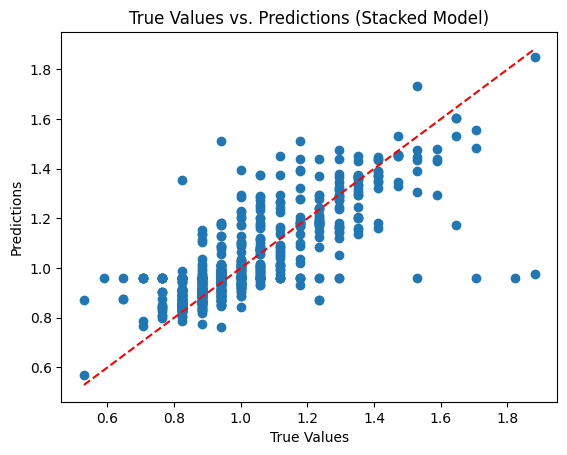

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor, Pool
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Split your data
X_train, X_test, y_train, y_test = train_test_split(
    first_55_pcs_df,
    one_hot_encoded_df2['proficient_score'],
    test_size=0.2,
    random_state=42
)

# Step 2: Random Forest Model with K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_train_preds = np.zeros(X_train.shape[0])
rf_test_preds = np.zeros(X_test.shape[0])

for train_index, val_index in kf.split(X_train):
    X_kf_train, X_kf_val = X_train.iloc[train_index], X_train.iloc[val_index]  # Use iloc here
    y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5, random_state=42)
    rf_model.fit(X_kf_train, y_kf_train)
    
    rf_train_preds[val_index] = rf_model.predict(X_kf_val)

rf_test_preds = rf_model.predict(X_test)

# Step 3: CatBoost Model with K-Fold
cat_train_preds = np.zeros(X_train.shape[0])
cat_test_preds = np.zeros(X_test.shape[0])

for train_index, val_index in kf.split(X_train):
    X_kf_train, X_kf_val = X_train.iloc[train_index], X_train.iloc[val_index]  # Use iloc here
    y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]
    train_pool = Pool(X_kf_train, y_kf_train, cat_features=categorical_features_indices)
    validation_pool = Pool(X_kf_val, y_kf_val, cat_features=categorical_features_indices)

    catboost_model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0, random_seed=42)
    catboost_model.fit(train_pool, eval_set=validation_pool, use_best_model=True)

    cat_train_preds[val_index] = catboost_model.predict(X_kf_val)

cat_test_preds = catboost_model.predict(X_test)


# Step 4: Stack Predictions
stacked_train = np.column_stack((rf_train_preds, cat_train_preds))
stacked_test = np.column_stack((rf_test_preds, cat_test_preds))

# Fit the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_train, y_train)

# Make final predictions using the meta-model
final_predictions = meta_model.predict(stacked_test)

# Evaluate the final model
final_mse = mean_squared_error(y_test, final_predictions)
final_r2 = r2_score(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f"Stacked Model - MSE: {final_mse:.2f}, R²: {final_r2:.2f}, RMSE: {final_rmse:.2f}")

# Optional: Visualizing the performance of the stacked model
plt.scatter(y_test, final_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions (Stacked Model)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.show()


# (models that isn't needed)

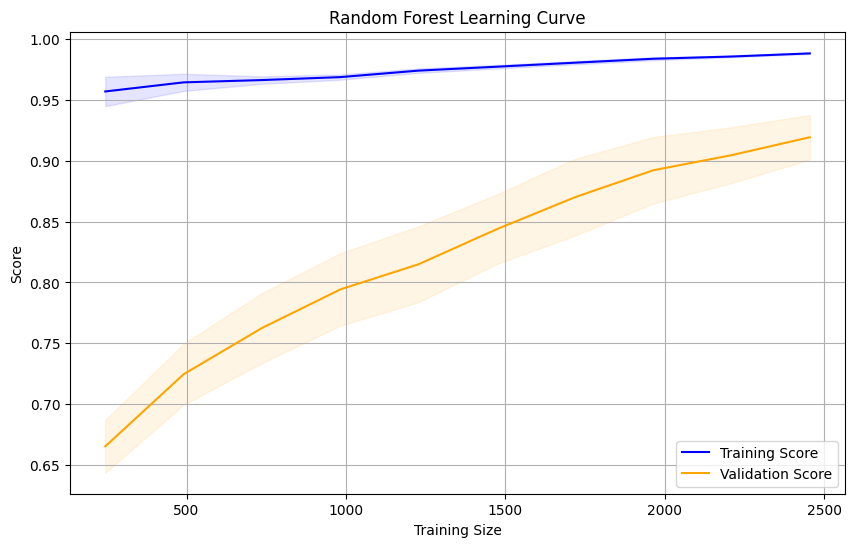

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate the mean and standard deviation for training scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate the mean and standard deviation for validation scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotting the learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
    plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')

    # Plotting the standard deviation
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.1)

    # Adding titles and labels
    plt.title('Random Forest Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function with your Random Forest model and data
plot_learning_curve(rf_model, X_train, y_train)


In [123]:
from sklearn.linear_model import Lasso

# Train Lasso
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train)

# Predictions
lasso_y_pred = lasso_model.predict(X_test)

# Evaluate
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_rmse = np.sqrt(lasso_mse)

print(f"Lasso Regression - MSE: {lasso_mse:.2f}, R²: {lasso_r2:.2f}, RMSE: {lasso_rmse:.2f}")


Lasso Regression - MSE: 0.03, R²: 0.33, RMSE: 0.16


In [186]:
'''
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Define the LightGBM model
print("Defining the LightGBM model...")
lgb_model = lgb.LGBMRegressor(random_state=42)

# Step 2: Set up the parameter grid for hyperparameter tuning
print("Setting up the parameter grid for hyperparameter tuning...")
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [-1, 3, 5, 7],
    'num_leaves': [31, 63, 127],
    'subsample': [0.6, 0.8, 1.0],
}

# Step 3: Create a custom scoring function to track progress
def verbose_grid_search(estimator, param_grid, X, y):
    print("Starting Grid Search...")
    for n_estimators in param_grid['n_estimators']:
        for learning_rate in param_grid['learning_rate']:
            for max_depth in param_grid['max_depth']:
                for num_leaves in param_grid['num_leaves']:
                    for subsample in param_grid['subsample']:
                        print(f"Evaluating: n_estimators={n_estimators}, learning_rate={learning_rate}, "
                              f"max_depth={max_depth}, num_leaves={num_leaves}, subsample={subsample}")
                        # Fit the model with current parameters
                        estimator.set_params(n_estimators=n_estimators, learning_rate=learning_rate,
                                              max_depth=max_depth, num_leaves=num_leaves, subsample=subsample)
                        estimator.fit(X, y)

# Perform Grid Search with verbose output
print("Performing custom Grid Search with detailed progress...")
verbose_grid_search(lgb_model, param_grid, X_train, y_train)

# Step 4: After manually searching, you would store the best parameters manually based on your criteria.

# Step 5: Make predictions using the best model (you can specify your best parameters here)
print("Making predictions using the best LightGBM model...")
best_lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, num_leaves=31, subsample=1.0, random_state=42)
best_lgb_model.fit(X_train, y_train)
lgb_y_pred = best_lgb_model.predict(X_test)

# Step 6: Evaluate the LightGBM model
print("Evaluating the LightGBM model...")
lgb_mse = mean_squared_error(y_test, lgb_y_pred)
lgb_r2 = r2_score(y_test, lgb_y_pred)
lgb_rmse = np.sqrt(lgb_mse)

print(f"LightGBM - MSE: {lgb_mse:.2f}, R²: {lgb_r2:.2f}, RMSE: {lgb_rmse:.2f}")
'''

'\nimport lightgbm as lgb\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import mean_squared_error, r2_score\nimport numpy as np\n\n# Step 1: Define the LightGBM model\nprint("Defining the LightGBM model...")\nlgb_model = lgb.LGBMRegressor(random_state=42)\n\n# Step 2: Set up the parameter grid for hyperparameter tuning\nprint("Setting up the parameter grid for hyperparameter tuning...")\nparam_grid = {\n    \'n_estimators\': [100, 200],\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'max_depth\': [-1, 3, 5, 7],\n    \'num_leaves\': [31, 63, 127],\n    \'subsample\': [0.6, 0.8, 1.0],\n}\n\n# Step 3: Create a custom scoring function to track progress\ndef verbose_grid_search(estimator, param_grid, X, y):\n    print("Starting Grid Search...")\n    for n_estimators in param_grid[\'n_estimators\']:\n        for learning_rate in param_grid[\'learning_rate\']:\n            for max_depth in param_grid[\'max_depth\']:\n                for num_leaves in param_grid[\'nu